## Análisis de los productos más deseados

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [52]:
# Cargo las columnas que necesito
datos = pd.read_csv('/home/lautaro/Desktop/events.csv', usecols = lambda col: col in ["event", "person", "model"])

In [53]:
views = datos.loc[datos["event"] == "viewed product", ["person", "model"]]
compras = datos.loc[datos["event"] == "conversion", ["person", "model"]]
views["cantidad_vistos"] = 1
compras["comprado"] = 1

In [54]:
views = views.groupby(["person","model"], as_index=False).sum()
compras = compras.groupby(["person", "model"], as_index=False).sum()

In [55]:
merged = views.merge(compras, left_on=["person","model"], right_on=["person","model"],how="outer")

In [56]:
views_sin_compras = merged.loc[merged["comprado"].isnull(),["person","model","cantidad_vistos"]]

In [57]:
print(views_sin_compras.nlargest(10, "cantidad_vistos"))

         person      model  cantidad_vistos
84887  c501ff3a  iPhone 5c            812.0
93934  d7e60792   iPhone 7            532.0
59054  88cabe99  iPhone 6S            495.0
24892  3b5a5833  iPhone SE            466.0
24886  3b5a5833   iPhone 6            397.0
22707  35cf2bcd   iPhone 6            342.0
55518  7ffacfa4  iPhone 5s            311.0
46083  6d2fe2db  iPhone 5s            304.0
55360  7fa9d215  iPhone 6S            304.0
63198  9250d410  iPhone 6S            286.0


Hasta acá tenemos la lista de los usuarios que más han visto un modelo de celular sin comprarlo, estos datos nos pueden servir para ofrecerles a esos usuarios en particular algún tipo de descuento exclusivo para motivarlos a concretar esa compra del producto que tanto quieren.

También podemos obtener qué modelos de celular son los más deseados entre nuestros usuarios:

In [58]:
views_sin_compras = views_sin_compras.drop(columns={"person"})

In [59]:
views_sin_compras = views_sin_compras.groupby("model", as_index=False).mean().sort_values(by="cantidad_vistos", ascending=False)

In [66]:
print views_sin_compras.head(20)

                            model  cantidad_vistos
132        Samsung Galaxy S7 Edge         8.401549
189                     iPhone 5s         7.777821
188                     iPhone 5c         7.605176
190                      iPhone 6         7.509240
192                     iPhone 6S         7.309422
194                      iPhone 7         6.877832
198                     iPhone SE         6.735622
46          Motorola Moto G4 Plus         6.569963
195                 iPhone 7 Plus         6.193470
128        Samsung Galaxy S6 Edge         5.430294
193                iPhone 6S Plus         5.240562
131             Samsung Galaxy S7         5.203202
191                 iPhone 6 Plus         5.200521
133             Samsung Galaxy S8         5.101529
187                      iPhone 5         4.937856
134        Samsung Galaxy S8 Plus         4.932118
72         Samsung Galaxy A5 2017         4.872762
53   Motorola Moto X Play 4G Dual         4.736682
56               Motorola Moto 

Lo que nos dice esta tabla es la cantidad de veces que entra a ver un producto un usuario que no lo compró, en inglés a estas personas se las llama "window shoppers". Es muy probable que esta gente este a la espera del precio adecuado y Trocafone sea uno de los tantos lugares que visita para encontrar ese precio.

Text(0,0.5,'Modelo')

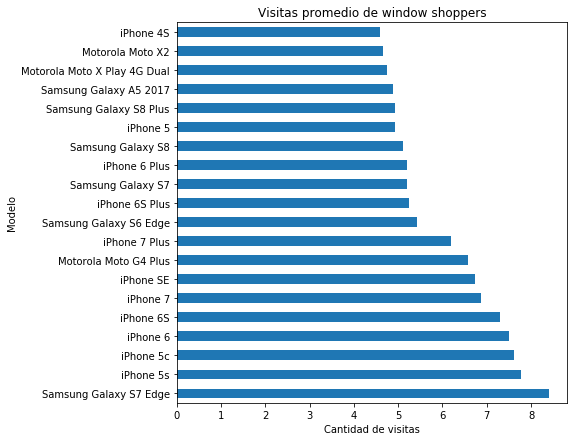

In [77]:
views_sin_compras.head(20).plot(kind="barh", figsize=(7,7), legend=False, x="model")

plt.title("Visitas promedio de window shoppers")
plt.xlabel("Cantidad de visitas")
plt.ylabel("Modelo")